In [1]:
# optional but useful for debugging - reimports modules after editing and saving .py files
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import astropy
from astropy import units as u
import astromet
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
dr2period=22/12 # in years
edr3Period=34/12 # in years
mas=astromet.mas # conversion from degrees to milli-arcseconds

In [60]:
# times when system is observed [years, CE]
ts=2016+np.sort(edr3Period*(-0.5+np.random.rand(64)))

# an object wich holds all the necessary parameters to find the astrometric path
params=astromet.params()

# For this example we'll generate a random binary system

# center of mass parameters
params.RA=360*np.random.rand()
params.Dec=90*(-1+2*np.random.rand())
print('RA and Dec [degrees]: \n',params.RA,params.Dec)
params.pmRAc=10*np.random.randn()
params.pmDec=10*np.random.randn()
print('Proper motion in RA and Dec [mas/yr]: \n',params.pmRAc,params.pmDec)
params.pllx=1+9*np.random.rand()
print('Parallax [mas]: \n',params.pllx)

# binary parameters
params.M=10*np.random.rand()**2
print('Mass of brightest source [mSun]: \n',params.M)
params.a=10*np.random.rand()
print('Semi-major axis [AU]: \n',params.a)
params.e=np.random.rand()
print('Eccentricity [dimensionless]: \n',params.e)
params.q=10*(np.random.rand()**4)
params.l=np.random.rand()
print('Light (l<1) and mass (q) ratios of binary [dimensionless]: \n',params.l,params.q)
params.vPhi=2*np.pi*np.random.rand()
params.vTheta=np.pi*np.random.rand()
print('On-sky projection angles (vPhi and vTheta) of binary [radians]: \n',params.vPhi,params.vTheta)
params.vOmega=2*np.pi*np.random.rand()
print('On-sky orientation angle of binary [radians]: \n',params.vOmega)
params.tPeri=2016+astromet.period(params)*np.random.rand()
print('Time of first binary periapse [years]: \n',params.tPeri)

print('\nPeriod [years]: \n',astromet.period(params))

RA and Dec [degrees]: 
 349.32800937966226 -53.30150329453893
Proper motion in RA and Dec [mas/yr]: 
 -10.03943044895274 -7.812060330674765
Parallax [mas]: 
 9.420319455993269
Mass of brightest source [mSun]: 
 5.600956339015312
Semi-major axis [AU]: 
 1.546291938992126
Eccentricity [dimensionless]: 
 0.48800138206321597
Light (l<1) and mass (q) ratios of binary [dimensionless]: 
 0.8226572069431423 0.0002894121626489545
On-sky projection angles (vPhi and vTheta) of binary [radians]: 
 5.191858607167419 1.4663367189387384
On-sky orientation angle of binary [radians]: 
 4.826581897391086
Time of first binary periapse [years]: 
 2016.4545842710436

Period [years]: 
 0.8103039588890187


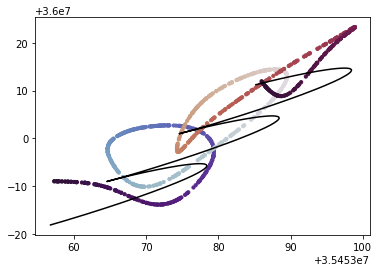

NameError: name 'vsdvsddfv' is not defined

In [61]:
ts=2016+np.sort(edr3Period*(-0.5+np.random.rand(1000)))

params.RA=10#360*np.random.rand()
params.Dec=10#90*(-1+2*np.random.rand())
params.pmRAc=10
params.pmDec=10
params.pllx=10

# on sky paths [degrees]
racs,decs=astromet.track(ts,params,comOnly=True)
cs=mpl.cm.twilight_shifted(np.interp(ts,[ts[0],ts[-1]],[0,1]))

plt.plot(racs,decs,c='k')

racs,decs=astromet.track(ts,params,comOnly=False)

plt.scatter(racs,decs,c=cs,s=10)
plt.show()



vsdvsddfv
# adding random (1/3 mas) error
astError=1
ras=ras+astError*mas*np.random.randn(ras.size)/np.sqrt(2)
decs=decs+astError*mas*np.random.randn(ras.size)/np.sqrt(2)

# fitting for offset from first obs (delta RA_0 & delta Dec_0), proper motion and parralax
fitParams,fitCovariance=astromet.fit(ts,ras,decs,astError=astError)
print('original parameters [mas(/yr)]: \n',0,0,params.pmRA,params.pmDec,params.pllx)
print('derived parameters [mas(/yr)]: \n',fitParams)
# extracting single parameter errors from covariance matrix
fitErrors=np.sqrt(np.diagonal(fitCovariance))/astError
print('derived parameter error [mas]: \n',fitErrors)
# note that parameters may not agree within error bars due to binary contribution

print('\ncovariance matrix [mas**2]: \n',fitCovariance)


## mistake somewhere in this calibration
## ruwe is sqrt magnitude of covariance matrix normalised by error
#uwe=np.sqrt(np.linalg.norm(fitCovariance))/astError
#print('UWE [dimensionless]: \n',uwe)

print(np.median(ras)/mas+fitParams[0]-params.RA/mas)
print(params.RA)

In [7]:
print(ras)

[89.74310545 89.74310562 89.74310553 89.74310525 89.74310529 89.74310511
 89.74310415 89.74310359 89.74310302 89.74310245 89.74310208 89.7431018
 89.74310164 89.74310141 89.74310165 89.74310145 89.74310188 89.74310236
 89.74310214 89.74310284 89.74310341 89.74310366 89.74310393 89.74310444
 89.743104   89.74310457 89.74310488 89.74310413 89.74310428 89.7431028
 89.74310247 89.74310228 89.7431016  89.74310177 89.74310129 89.7431009
 89.74310137 89.74310083 89.74310097 89.74310113 89.743101   89.74310093
 89.74310143 89.74310155 89.74310228 89.74310315 89.74310325 89.7431035
 89.74310385 89.74310479 89.74310473 89.74310488 89.74310513 89.74310458
 89.74310319 89.74310234 89.74310239 89.74310214 89.74310203 89.74310141
 89.74310068 89.74310075 89.74310109 89.74310092]


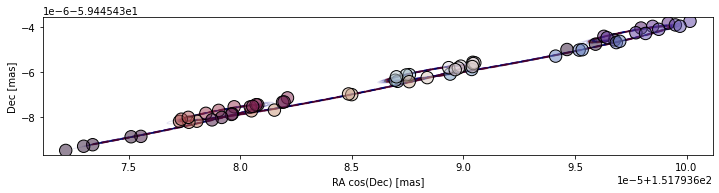

In [372]:
# plotting on sky motion
qFig=plt.figure(figsize=(12,8))
qPl=plt.gca() # defining matplotlib axis object on which to plot

cs=mpl.cm.twilight_shifted(np.interp(ts,[ts[0],ts[-1]],[0,1])) # optional, but I like to color by time
cs[:,3]=0.5

# plotting the datapoints (ideally as error ellipses -
# if that fails comment out the for loop and use the simpler scatter plot instead)
for i in range(ras.size):
    ell = mpl.patches.Ellipse(xy=(ras[i]*np.cos(decs[i]*np.pi/180), decs[i]),
                  width=2*astError*mas, height=2*astError*mas,
                  angle=0)
    ell.set_facecolor(cs[i])
    ell.set_edgecolor('k')
    qPl.add_artist(ell)
#qPl.scatter(ras*np.cos(decs*np.pi/180),decs,s=50,c=cs,zorder=2,edgecolors='k',lw=1)

# uniformly sampled times for plotting true paths
tUniform=np.linspace(ts[0],ts[-1],1000)

# optional - adding the centre of mass motion (black) for reference
comRas,comDecs=astromet.path(tUniform,params,comOnly=True)
qPl.plot(comRas*np.cos(comDecs*np.pi/180),comDecs,lw=1,c='k',alpha=0.5,zorder=1)

# optional - adding the centre of mass motion (red) for reference
trueRas,trueDecs=astromet.path(tUniform,params)
qPl.plot(trueRas*np.cos(trueDecs*np.pi/180),trueDecs,lw=2,c='darkred',alpha=0.5,zorder=1,ls='--')

# optional - adding fitted motion (blue)
for i in range(32):
    sampleParams = np.random.multivariate_normal(fitParams, fitCovariance)
    
    fitPs=astromet.params()
    fitPs.RA=np.median(ras)+mas*sampleParams[0]
    fitPs.Dec=np.median(decs)+mas*sampleParams[1]
    fitPs.pmRA=sampleParams[2]
    fitPs.pmDec=sampleParams[3]
    fitPs.pllx=sampleParams[4]
    bestRas,bestDecs=astromet.path(tUniform,fitPs,comOnly=True)
    qPl.plot(bestRas*np.cos(bestDecs*np.pi/180),bestDecs,lw=1,c='darkblue',alpha=0.1,zorder=0)
fitPs=astromet.params()
fitPs.RA=np.median(ras)+mas*fitParams[0]
fitPs.Dec=np.median(decs)+mas*fitParams[1]
fitPs.pmRA=fitParams[2]
fitPs.pmDec=fitParams[3]
fitPs.pllx=fitParams[4]
bestRas,bestDecs=astromet.path(tUniform,fitPs,comOnly=True)
qPl.plot(bestRas*np.cos(bestDecs*np.pi/180),bestDecs,lw=2,c='darkblue',alpha=0.8,zorder=0,ls='--')

# adding initial position and proper motion as arrow
#qPl.arrow(np.median(ras*np.cos(decs*np.pi/180)),np.median(decs),mas*params.pmRA,mas*params.pmDec,color='k',alpha=0.5)

qPl.set_xlabel('RA cos(Dec) [mas]')
qPl.set_ylabel('Dec [mas]')
qPl.set_aspect('equal')

plt.show()

In [373]:
print('Period: ',astromet.period(params))
print('eccentricity: ',params.e)
uweobs=astromet.uwe(ts,ras,decs,fitParams,astError=1)
print('____________UWE obs: ',uweobs)
dthetapred=astromet.dThetaEstimate(params,ts[0],ts[-1])
print('____________UWE predicted: ',np.sqrt(1+(dthetapred)**2))
dthetasimp=astromet.dThetaEstimate(params,ts[0],ts[0]+params.P)
print('____________UWE simple: ',np.sqrt(1+(dthetasimp)**2))

Period:  3.1434281947297515
eccentricity:  0.8245063389081532
____________UWE obs:  1.0161110129695214
____________UWE predicted:  1.0
____________UWE simple:  1.0
